In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ml_data/classification_data.csv')

info = data[['Raters', 'Reviewers', 'Pages', 'PublishYear']]
labels = data.review

info_train, info_test, labels_train, labels_test = train_test_split(info, labels, train_size = 0.8, test_size = 0.2, random_state=42)

In [8]:
def accuracy(predict, labels):
    correct = 0
    
    for i in range(len(labels)):
        if predict[i] == labels[i]:
            correct += 1
            
    return correct/len(labels)

In [3]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(info_train, labels_train)

predict = classifier.predict(info_test)

In [9]:
test_labels = labels_test.values.tolist()

result_matrix = np.zeros((3, 3), dtype='int32')

for i in range(len(test_labels)):
    result_matrix[test_labels[i]][predict[i]] += 1

print(result_matrix)
print(accuracy(predict, test_labels))

[[    3    49    45]
 [   48  1968  4042]
 [   64  2841 10464]]
0.6369084204056545


In [6]:
neighbors = list(range(1, 101))
k_accuracy = []

for k in neighbors:
    indep_classifier = KNeighborsClassifier(n_neighbors = k)
    indep_classifier.fit(info_train, labels_train)
    
    indep_predict = indep_classifier.predict(info_test)
    
    k_accuracy.append(accuracy(indep_predict, test_labels))

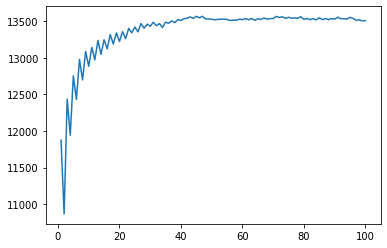

In [7]:
plt.plot(neighbors, k_accuracy)
plt.show()

In [11]:
classifier_v2 = KNeighborsClassifier(n_neighbors = 41)
classifier_v2.fit(info_train, labels_train)

predict_v2 = classifier_v2.predict(info_test)

In [12]:
result_matrix_v2 = np.zeros((3, 3), dtype='int32')

for i in range(len(test_labels)):
    result_matrix_v2[test_labels[i]][predict_v2[i]] += 1

print(result_matrix_v2)
print(accuracy(predict_v2, test_labels))

[[    0    46    51]
 [    0  1069  4989]
 [    0   903 12466]]
0.6932493341528375


In [13]:
classifier_v3 = KNeighborsClassifier(n_neighbors = 11)
classifier_v3.fit(info_train, labels_train)

predict_v3 = classifier_v3.predict(info_test)

In [14]:
result_matrix_v3 = np.zeros((3, 3), dtype='int32')

for i in range(len(test_labels)):
    result_matrix_v3[test_labels[i]][predict_v3[i]] += 1

print(result_matrix_v3)
print(accuracy(predict_v3, test_labels))

[[    0    45    52]
 [    0  1527  4531]
 [    0  1756 11613]]
0.6730178242163491
